In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_outside = pd.read_csv("raw/results_raw_outside.csv")
df_joint0 = pd.read_csv("raw/results_raw_joint0.csv")
df_joint3 = pd.read_csv("raw/results_raw_joint3.csv")
df_ee = pd.read_csv("raw/results_raw_end-effector.csv")

Change Model_id to compare results along different models|
|model_id | model|
|---|---|
|0 | k Nearest Neighbors|
|1 |Linear Regression|
|2| DNN (1 hidden layer)|
|3| DNN (1 hidden layers)|
|4| DNN (1 hidden layers)|
|5| CNN (1 Channel)|
|6| CNN (2 Channels)|
|7| CNN (3 Channels)|
|8| CNN (4 Channels)|

In [8]:
comp_out_df = df_outside.loc[df_outside.model_id == 5].copy()
comp_out_df["Mic Position"] = "Outside"
comp_j0_df = df_joint0.loc[df_joint0.model_id == 5].copy()
comp_j0_df["Mic Position"] = "Joint 0"
comp_j3_df = df_joint3.loc[df_joint0.model_id == 5].copy()
comp_j3_df["Mic Position"] = "Joint 3"
comp_ee_df = df_ee.loc[df_ee.model_id == 5].copy()
comp_ee_df["Mic Position"] = "End Effector"

In [9]:
comp_df = pd.concat([comp_out_df, comp_j0_df, comp_j3_df, comp_ee_df])

In [10]:
comp_df["Joint 0"] = np.rad2deg(np.abs(comp_df.true_q0 - comp_df.pred_q0))
comp_df["Joint 3"] = np.rad2deg(np.abs(comp_df.true_q3 - comp_df.pred_q3))

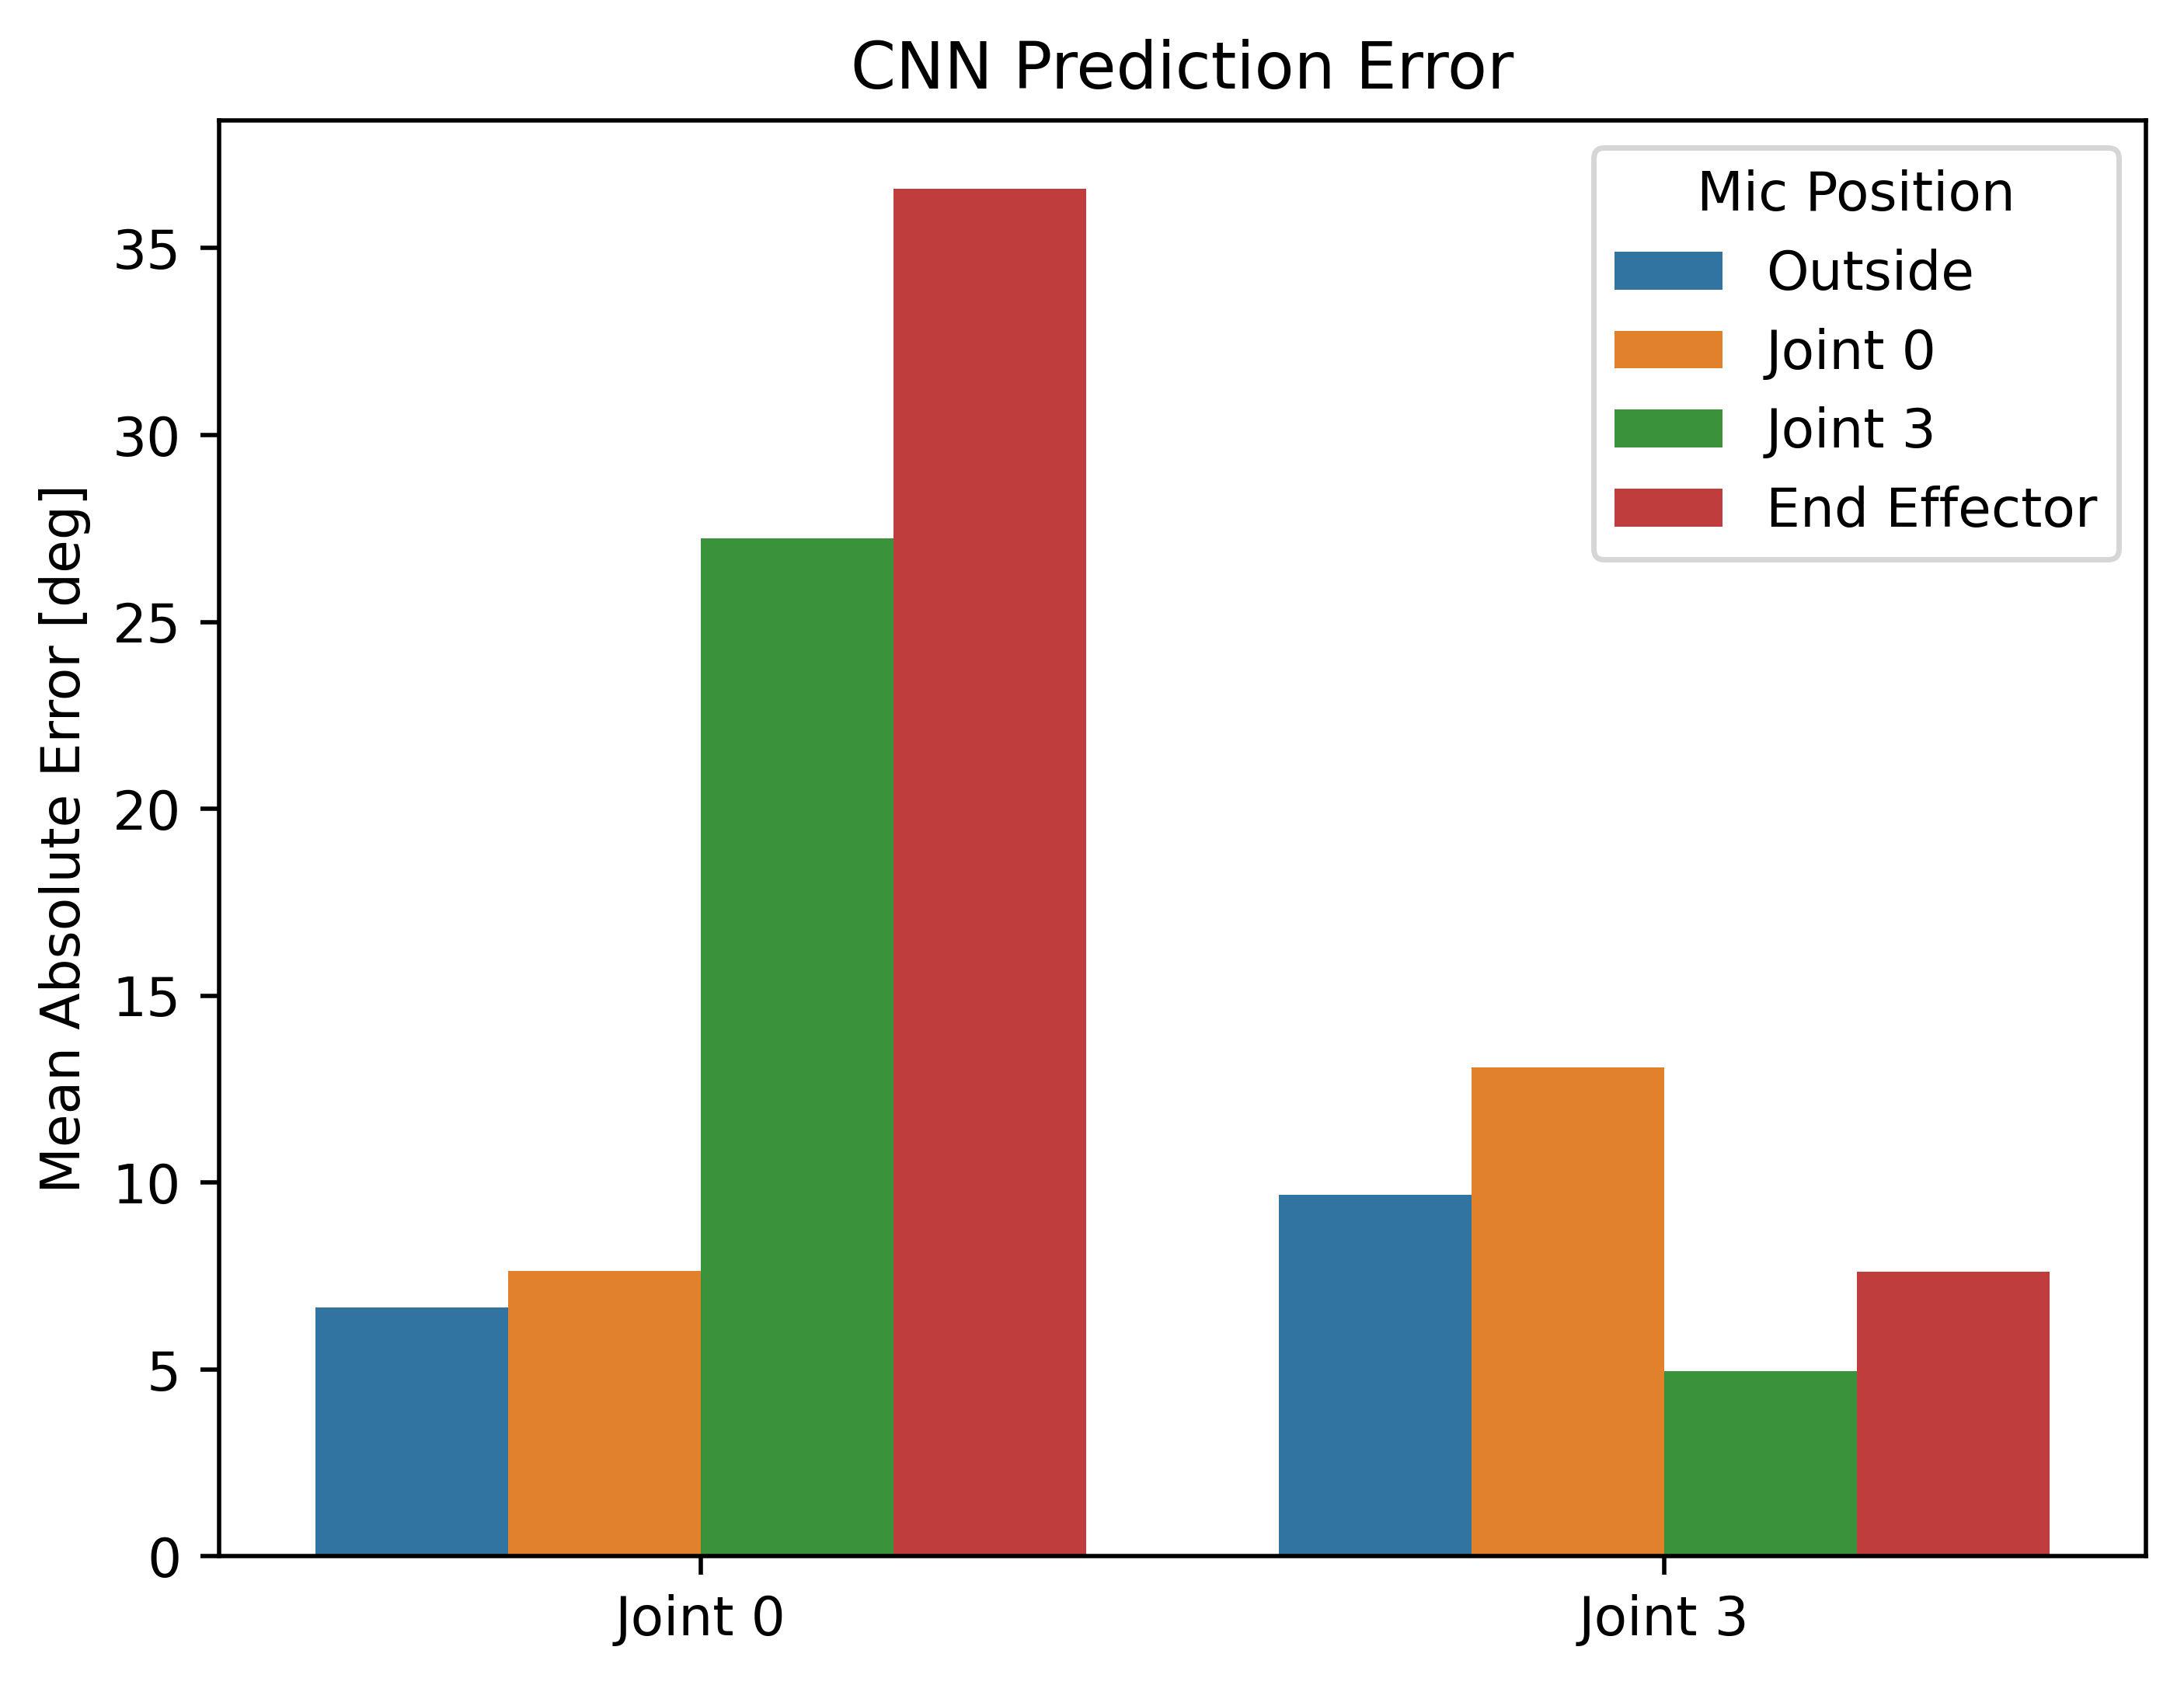

In [11]:
error_longform = comp_df.melt(id_vars="Mic Position", value_vars=["Joint 0", "Joint 3"])
ax = sns.barplot(data=error_longform, x="variable", y="value", hue="Mic Position", errorbar=None)#("pi",50))#("ci", 99))
plt.xlabel("")
plt.ylabel("Mean Absolute Error [deg]")
plt.title("CNN Prediction Error")
plt.gcf().set_dpi(500)

In [12]:
error_longform.pivot_table(values="value", index="Mic Position", columns="variable")

variable,Joint 0,Joint 3
Mic Position,,
End Effector,36.579368,7.623285
Joint 0,7.627220,13.072557
Joint 3,27.242069,4.962703
Outside,6.665648,9.673911
